In [21]:
import os
from os.path import join, basename
from glob import glob
import rasterio as rio
import numpy as np

from uavsar_pytools import UavsarImage, UavsarScene, UavsarCollection

In [11]:
img_url = 'http://uavsar.asfdaac.alaska.edu/UA_alamos_35915_20008-000_20013-000_0007d_s01_L090_02/alamos_35915_20008-000_20013-000_0007d_s01_L090HH_02.amp1.grd'
work_dir = '/tmp/pytools_test/'
image = UavsarImage(url = img_url, work_dir=work_dir)
image.url_to_tiff()
os.listdir(join(work_dir))

In [4]:
scene_url = 'https://datapool.asf.alaska.edu/INTERFEROMETRY_GRD/UA/grmesa_27416_20005-007_20008-004_0007d_s01_L090_01_int_grd.zip'
work_dir = '/tmp/pytools_test/'
scene = UavsarScene(url = scene_url, work_dir=work_dir)
scene.url_to_tiffs()
os.listdir(join(work_dir, basename(scene_url).replace('.zip','')))

Unzipping: 100%|██████████| 20/20 [00:16<00:00,  1.18file/s]


In [27]:
collection_name = 'Grand Mesa, CO'
work_dir = '/tmp/pytools_test/'
collection = UavsarCollection(collection = collection_name, work_dir = work_dir, inc = True, dates = ('2020-03-01','2020-04-02'))
collection.find_urls()
print(len(collection.results))
collection.results_to_tiffs()

INFO:uavsar_pytools.uavsar_collection:Found 2 image pairs
INFO:uavsar_pytools.uavsar_collection:Starting on: https://datapool.asf.alaska.edu/INTERFEROMETRY_GRD/UA/grmesa_27416_20003-028_20017-006_0040d_s01_L090_01_int_grd.zip


2


Unzipping: 100%|██████████| 5/5 [00:03<00:00,  1.66file/s]


INFO:uavsar_pytools.uavsar_collection:Starting on: https://datapool.asf.alaska.edu/INTERFEROMETRY_GRD/UA/grmesa_27416_20013-004_20017-006_0015d_s01_L090_01_int_grd.zip


Completed 1-Feb-2020 02:13:16 UTC to 12-Mar-2020 18:17:08 UTC


Unzipping: 100%|██████████| 20/20 [00:18<00:00,  1.09file/s]


Completed 26-Feb-2020 17:40:39 UTC to 12-Mar-2020 18:16:50 UTC


In [2]:
from uavsar_pytools.snow_depth_inversion import depth_from_phase, phase_from_depth
from uavsar_pytools.georeference import reproject_clip_mask

In [3]:
work_dir = '/tmp/pytools_test/'
unw_fp = glob(join('/tmp/pytools_test/', 'grmesa_27416_20013-004_20017-006_0015d_s01_L090_01_int_grd','*VV*.unw.grd.tiff'))[0]
inc_fp = glob(join('/tmp/pytools_test/', 'grmesa_27416_20013-004_20017-006_0015d_s01_L090_01_int_grd','*inc.tiff'))[0]
new_inc_fp = join(work_dir, 'inc_resampled.tif')

reproject_clip_mask(inc_fp, unw_fp, out_fp=new_inc_fp))

3.6716382e-13

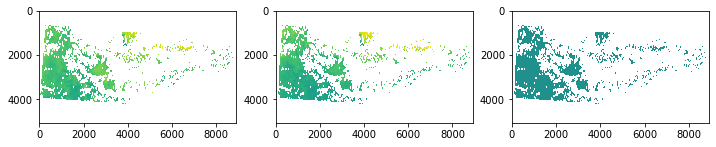

In [6]:
import matplotlib.pyplot as plt
with rio.open(unw_fp) as unw_src, rio.open(new_inc_fp) as inc_src:
    unw = unw_src.read(1)
    inc = inc_src.read(1)
    dz = depth_from_phase(unw, inc, permittivity=1.2)
    dphase = phase_from_depth(dz, inc, permittivity=1.2)
f, (ax1, ax2, ax3) = plt.subplots(1,3,figsize = (12,8))
ax1.imshow(unw, vmin = -np.pi, vmax= np.pi)
ax2.imshow(dz, vmin = -0.5, vmax = 0.5)
phase_diff = unw - dphase
ax3.imshow(phase_diff, vmin = -0.1, vmax= 0.1)
np.nanmean(phase_diff)

In [26]:
polsar_url = 'https://datapool.asf.alaska.edu/PROJECTED/UA/eelriv_24500_21059_002_211018_L090_CX_01_grd.zip'
scene = UavsarScene(url =polsar_url, work_dir=work_dir)
scene.download()
scene.unzip()

Unzipping: 100%|██████████| 7/7 [00:11<00:00,  1.66s/file]


In [1]:
from uavsar_pytools.polsar import H_A_alpha_decomp
from os.path import join

In [2]:
work_dir = '/tmp/pytools_test/'
polsar_dir = join(work_dir, 'tmp', 'eelriv_24500_21059_002_211018_L090_CX_01_grd','bin_imgs')
H_A_alpha_decomp(polsar_dir, out_dir = join(work_dir, 'polsar_out'), parralel = True)

[                                        ] | 0% Completed | 46.97 sms


In [ ]:
polsar_url = 'https://datapool.asf.alaska.edu/PROJECTED/UA/eelriv_24500_21059_002_211018_L090_CX_01_grd.zip'
scene = UavsarScene(url =polsar_url, work_dir=work_dir)
scene.download()
scene.unzip()

In [23]:
from uavsar_pytools.georeference import geolocate_uavsar
from uavsar_pytools.incidence_angle import calc_inc_angle

In [14]:
cd /tmp/pytools_test

/private/tmp/pytools_test


In [15]:
!mkdir georef_inc_test

mkdir: georef_inc_test: File exists


In [16]:
cd georef_inc_test

/private/tmp/pytools_test/georef_inc_test


In [18]:
!wget https://downloaduav2.jpl.nasa.gov/Release20/grmesa_26006_01/grmesa_26006_01_BC.dop
!wget https://downloaduav2.jpl.nasa.gov/Release20/grmesa_26006_01/grmesa_26006_01_BC_s1_2x8.llh
!wget https://downloaduav2.jpl.nasa.gov/Release20/grmesa_26006_01/grmesa_26006_01_BC_s1_2x8.lkv
!wget https://downloaduav2.jpl.nasa.gov/Release20/grmesa_26006_01/grmesa_26006_17002_001_170206_L090HH_01_BC.ann

--2022-06-27 15:38:47--  https://downloaduav2.jpl.nasa.gov/Release20/grmesa_26006_01/grmesa_26006_01_BC.dop
Resolving downloaduav2.jpl.nasa.gov (downloaduav2.jpl.nasa.gov)... 137.78.249.121
Connecting to downloaduav2.jpl.nasa.gov (downloaduav2.jpl.nasa.gov)|137.78.249.121|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 229372 (224K)
Saving to: ‘grmesa_26006_01_BC.dop’

grmesa_26006_01_BC. 100%[===================>] 224.00K  --.-KB/s    in 0.1s    

2022-06-27 15:38:47 (2.28 MB/s) - ‘grmesa_26006_01_BC.dop’ saved [229372/229372]

--2022-06-27 15:38:48--  https://downloaduav2.jpl.nasa.gov/Release20/grmesa_26006_01/grmesa_26006_01_BC_s1_2x8.llh
Resolving downloaduav2.jpl.nasa.gov (downloaduav2.jpl.nasa.gov)... 137.78.249.121
Connecting to downloaduav2.jpl.nasa.gov (downloaduav2.jpl.nasa.gov)|137.78.249.121|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 675326340 (644M)
Saving to: ‘grmesa_26006_01_BC_s1_2x8.llh’

grmesa_26006_01_BC_ 100%

In [29]:
work_dir = '/tmp/pytools_test/'
lkv_fp = glob(join('/tmp/pytools_test/georef_inc_test', '*.lkv'))[0]
llh_fp = glob(join('/tmp/pytools_test/georef_inc_test', '*.llh'))[0]
ann_fp = glob(join('/tmp/pytools_test/georef_inc_test', '*.ann'))[0]
geolocate_uavsar(lkv_fp, ann_fp, out_dir = join(work_dir, 'geolocated_test'), llh_fp= llh_fp)

ERROR 1: Too many points (529 out of 529) failed to transform, unable to compute output bounds.
Warning 1: Unable to compute source region for output window 2433,0,811,551, skipping.
ERROR 1: Too many points (529 out of 529) failed to transform, unable to compute output bounds.
Warning 1: Unable to compute source region for output window 2433,551,405,276, skipping.
ERROR 1: Too many points (529 out of 529) failed to transform, unable to compute output bounds.
Warning 1: Unable to compute source region for output window 2433,827,202,138, skipping.
ERROR 1: Too many points (529 out of 529) failed to transform, unable to compute output bounds.
Warning 1: Unable to compute source region for output window 2534,965,101,69, skipping.
ERROR 1: Too many points (529 out of 529) failed to transform, unable to compute output bounds.
Warning 1: Unable to compute source region for output window 2635,827,203,138, skipping.
ERROR 1: Too many points (529 out of 529) failed to transform, unable to compu

In [ ]:
work_dir = '/tmp/pytools_test/'
lkv_fp = glob(join('/tmp/pytools_test/georef_inc_test', '*.lkv'))[0]
llh_fp = glob(join('/tmp/pytools_test/georef_inc_test', '*.llh'))[0]
ann_fp = glob(join('/tmp/pytools_test/georef_inc_test', '*.ann'))[0]
geolocate_uavsar(llh_fp, ann_fp, out_dir = join(work_dir, 'geolocated_test'), llh_fp= llh_fp)